In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
from pprint import pprint
import os
import json

%matplotlib inline
sns.set_style("darkgrid")
# https://stackoverflow.com/a/37347783/7060068
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [52]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [53]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_no-history_revenue'
dir_list = os.listdir(path)

In [55]:
print(f"number of folders = {len(dir_list)}")

number of folders = 909


## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=64,train_batch_size=3000, first-price auction

In [61]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=64
BATCH_SIZE=3000
AUCTION_TYPE='first-price'

In [62]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=0  # counter of the number of trials that satisfy this hyperparameter combination
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
df_results.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3600,4530.790547,1970.325843,7215.130149,4533.796988,2523.619641,6182.180548,3766.082100,1563.761172,7697.235161,4766.959203,2520.475407,7262.604082,11661.856642,10553.108214,13247.109351,16.744444,15,19,0.00,0,0
7200,4917.068760,1847.902387,7824.728486,4729.340145,2523.619641,7168.191689,3975.866411,1392.345295,7196.649121,5212.124685,1856.353114,7813.098073,11542.845319,9342.324922,13247.109351,17.050000,14,20,0.01,0,1
10800,4523.478120,2704.345972,7169.024821,4590.265471,3237.977601,7176.828558,3969.757119,1622.650590,7468.611360,4585.618634,2811.736411,7813.098073,12075.061601,8605.682462,14995.200362,16.980000,15,19,0.01,0,1
14400,5096.527459,2014.362785,8446.006968,5340.109857,2168.459231,8247.585786,4144.044496,1526.715689,7567.918386,5039.050470,2156.256670,8248.832189,10891.941114,8605.682462,14995.200362,16.800000,14,19,0.02,0,1
18000,5193.881176,2211.120612,8446.006968,4990.061257,2168.459231,8247.585786,4175.316869,1373.919677,7694.977189,5266.164648,2156.676937,8248.247518,11396.605987,9358.964423,12771.500781,17.110000,14,20,0.00,0,0


In [63]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

number of trials = 134
numbler of rows of the results: 1351


,timesteps,algorithms,mean social welfare
0,3600,Online Myopic,4533.796988
1,7200,Online Myopic,4729.340145
2,10800,Online Myopic,4590.265471
3,14400,Online Myopic,5340.109857
4,18000,Online Myopic,4990.061257


(0.0, 12684.63916150303)

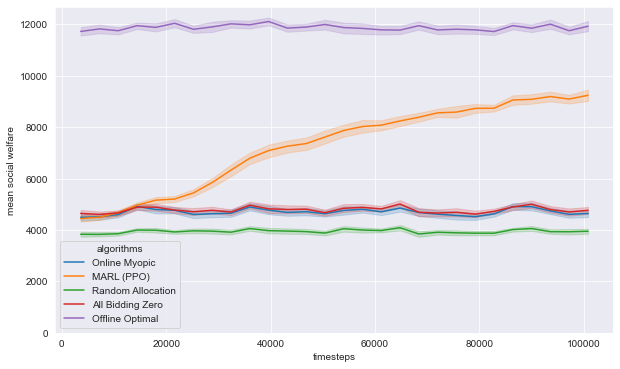

In [64]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=64,train_batch_size=3000, second-price auction

In [68]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=64
BATCH_SIZE=3000
AUCTION_TYPE='second-price'

In [69]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
df_results.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3600,3885.908969,1672.710973,9065.758943,4204.640829,2287.524270,6432.882413,3676.932864,1559.669897,8435.638570,4060.269683,1854.981678,7630.721105,12587.867564,11225.851913,13565.824477,17.966667,15,20,0.011111,0,1
7200,4277.131399,1853.121917,8409.409002,4423.005983,2287.524270,6476.147586,3853.714789,1582.561446,6312.936935,4307.812821,2288.398991,7185.940515,11228.458083,8446.088729,13565.824477,17.170000,15,20,0.030000,0,2
10800,4879.992323,2262.387060,8253.207271,4862.863346,3306.117579,6476.147586,4049.613078,1961.073387,8483.409637,4817.479322,3305.852194,8221.544833,11897.973557,8446.088729,13118.670046,16.750000,15,19,0.010000,0,1
14400,4711.154637,2580.258089,7743.106771,4798.008144,3039.009876,6417.089130,3784.174497,1541.580215,6979.596519,4856.248414,2975.189758,7336.095809,11028.888715,9012.873168,13090.903081,16.810000,15,19,0.010000,0,1
18000,5332.200210,2213.237965,8131.768349,5218.518168,2946.322630,6688.684703,4172.368341,1541.072169,7608.505688,5077.398941,2239.754994,6950.539687,10800.265171,9012.873168,13090.903081,16.790000,14,19,0.000000,0,0


In [70]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

number of trials = 133
numbler of rows of the results: 1344


,timesteps,algorithms,mean social welfare
0,3600,Online Myopic,4204.640829
1,7200,Online Myopic,4423.005983
2,10800,Online Myopic,4862.863346
3,14400,Online Myopic,4798.008144
4,18000,Online Myopic,5218.518168


(0.0, 12675.844459663946)

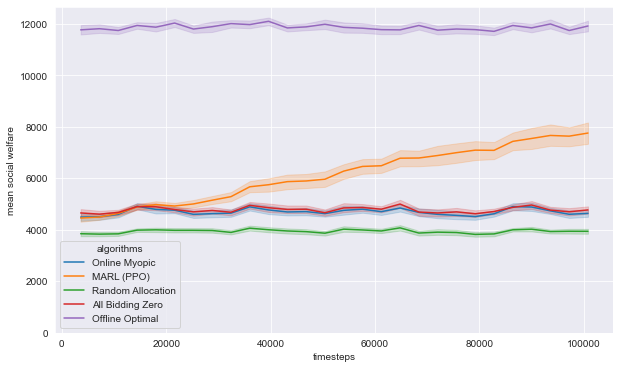

In [71]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.001,sgd_minibatch_size=64,train_batch_size=3000, first-price auction

In [72]:
# set some hyperparameters
LR=0.001
MINIBATCH_SIZE=64
BATCH_SIZE=3000
AUCTION_TYPE='first-price'

In [73]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 46
numbler of rows of the results: 1208


In [74]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12685.099661345756)

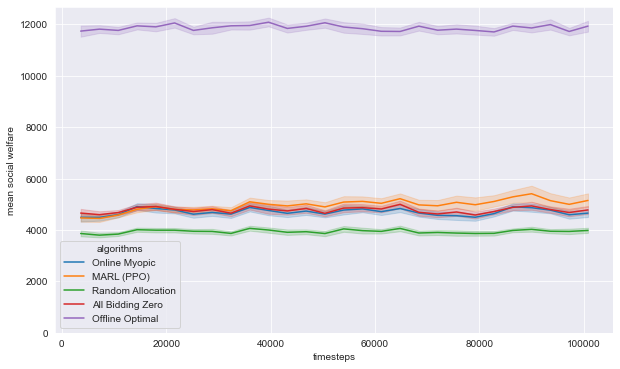

In [75]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.001,sgd_minibatch_size=64,train_batch_size=3000, second-price auction

In [77]:
# set some hyperparameters
LR=0.001
MINIBATCH_SIZE=64
BATCH_SIZE=3000
AUCTION_TYPE='second-price'

In [78]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 46
numbler of rows of the results: 1203


In [79]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12682.272498576333)

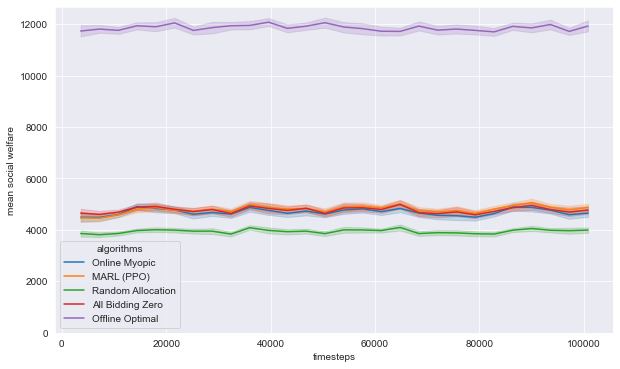

In [80]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=128,train_batch_size=3000, first-price auction

In [87]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=128
BATCH_SIZE=3000
AUCTION_TYPE='first-price'

In [88]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 42
numbler of rows of the results: 1087


In [89]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12743.435403138279)

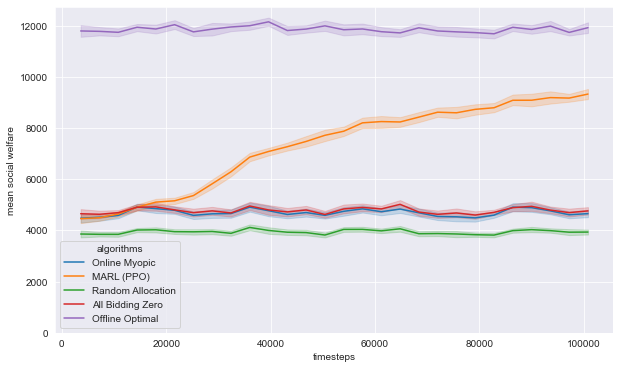

In [90]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=128,train_batch_size=3000, second-price auction

In [92]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=128
BATCH_SIZE=3000
AUCTION_TYPE='second-price'

In [93]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 41
numbler of rows of the results: 1070


In [94]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12747.12063103781)

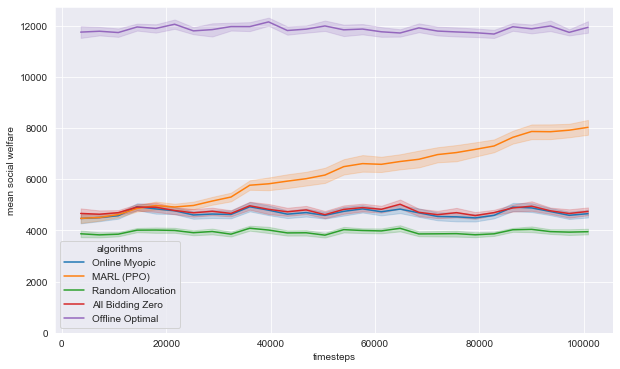

In [95]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=128,train_batch_size=4000, first-price auction

In [97]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=128
BATCH_SIZE=4000
AUCTION_TYPE='first-price'

In [98]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 32
numbler of rows of the results: 709


In [99]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12859.151429588826)

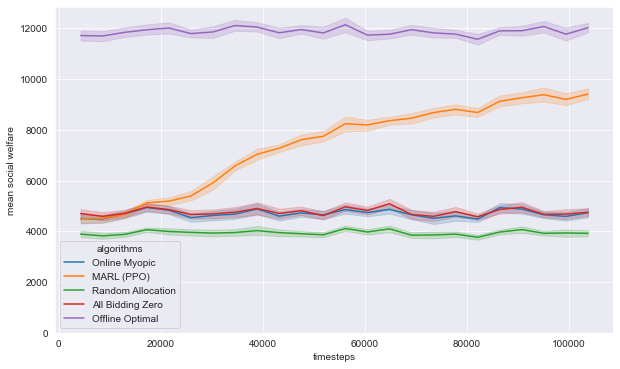

In [100]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, no-history, revenue as reward
- lr=0.0001,sgd_minibatch_size=128,train_batch_size=4000, second-price auction

In [102]:
# set some hyperparameters
LR=0.0001
MINIBATCH_SIZE=128
BATCH_SIZE=4000
AUCTION_TYPE='second-price'

In [103]:
# get the dataframe of the results
df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    params_path = f'{path}/{folder}/params.json'
    file_path = f'{path}/{folder}/result.json'
    try:
        with open(params_path) as f:
            params = json.load(f)
    except NotADirectoryError:  # some 
        continue
    if (params['lr']==LR and params['sgd_minibatch_size']== MINIBATCH_SIZE
    and params['train_batch_size']==BATCH_SIZE and params['env_config']['auction_type']==AUCTION_TYPE):
        cntr+=1
        with open(file_path) as f:
            # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
            # https://stackoverflow.com/a/29312618/7060068
            for line in f:
                data = json.loads(line)
    #             print(data)
    #             break
                data_row = data['custom_metrics']

        #         df = pd.DataFrame.from_dict(data, index=0)
                # https://stackoverflow.com/a/17840195/7060068
                df = pd.DataFrame(data_row, index=[data['timesteps_total']])
                results.append(df)
    else:
        continue
    

df_results = pd.concat(results, axis=0)
# df_results.head()
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")

number of trials = 32
numbler of rows of the results: 688


In [104]:
# process the results
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]

df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

# df_results_preproc.head()

(0.0, 12856.850709272885)

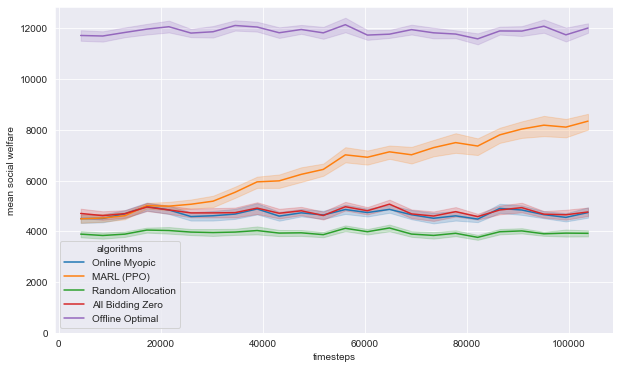

In [105]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [106]:
1/0

ZeroDivisionError: division by zero

## 40 tasks, 5 actions, first-price auction, no-history, revenue as reward
- lr=0.0001,layers=[256, 256, 256],train_batch_size=3000

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, no-history, revenue as reward
- lr=0.001,layers=[256, 256],train_batch_size=3000

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.001,layers=[256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, with-history, revenue as reward
- lr=0.0001,layers=[256, 256],train_batch_size=3000

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, with-history, revenue as reward
- lr=0.0001,layers=[256, 256],train_batch_size=4000

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=4000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, second-price auction, no-history, revenue as reward
- lr=0.0001,layers=[256, 256, 256],train_batch_size=3000

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_second-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [ ]:
1/0

In [ ]:
1/0

## 40 tasks, 5 actions, second-price auction, no-history

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_second-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [ ]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

In [ ]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [ ]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [ ]:
df_results_reset.head()

In [ ]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [ ]:
df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [ ]:
1/0

## 40 tasks, 5 actions, first-price auction, with-history

In [ ]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [ ]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

In [ ]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [ ]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [ ]:
df_results_reset.head()

In [ ]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [ ]:
df_results_preproc.head()

In [ ]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [ ]:
1/0

### Online Myopic

In [ ]:
# plot the confidence interval for the mean
# https://stackoverflow.com/a/44941463/7060068

p = sns.lineplot(x=df_results.index, y='Social Welfare (Online Myopic)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
# https://stackoverflow.com/a/57101557/7060068
p.axes.set_ylim(0)

### All Bidding Zero

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (All Bidding Zero)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### MARL

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### Random Allocation

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (Random Allocation)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

In [ ]:
1/0

## Use data from the progress.csv file.

In [ ]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
print(len(df_results))
df_results.head()

In [ ]:
df_results1 = df_results

In [ ]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
# sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [ ]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

In [ ]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

In [ ]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

In [ ]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [ ]:
result_oo.head()
result_fog.head()

In [ ]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [ ]:
stats.t.ppf(1-0.025, NoS -1)

In [ ]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

In [ ]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [ ]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

In [ ]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure